## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [25]:
#EDA to do list: 
# drop customer_id column DONE
# check for missing data DONE
# create boxplots for categorical variables DONE
# create density plots/histograms for quantitative vars DONE
#One Hot encoding: gender, country, Balance DONE

#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#11/16 TO DO LIST: 

#outlier removal (do before standardization)
#check for multicollinearity: corr plot and VIF ? 
#standardize data
#Lasso variable selection

In [5]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [6]:
data.min()

credit_score           350
country             France
gender              Female
age                     18
tenure                   0
balance                0.0
products_number          1
credit_card              0
active_member            0
estimated_salary     11.58
churn                    0
dtype: object

In [7]:
data.max()

credit_score              850
country                 Spain
gender                   Male
age                        92
tenure                     10
balance             250898.09
products_number             4
credit_card                 1
active_member               1
estimated_salary    199992.48
churn                       1
dtype: object

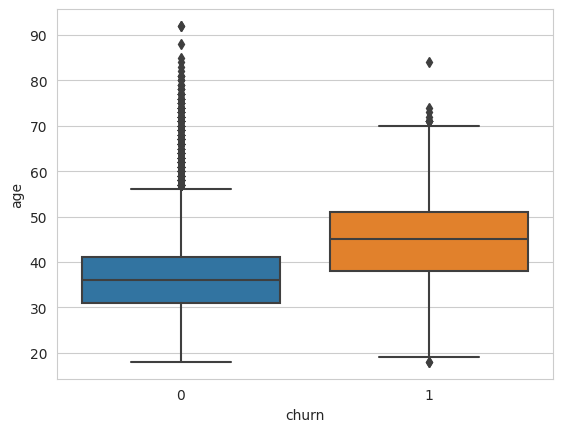

In [8]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='churn', y='age', data=data)

<AxesSubplot:xlabel='balance', ylabel='Count'>

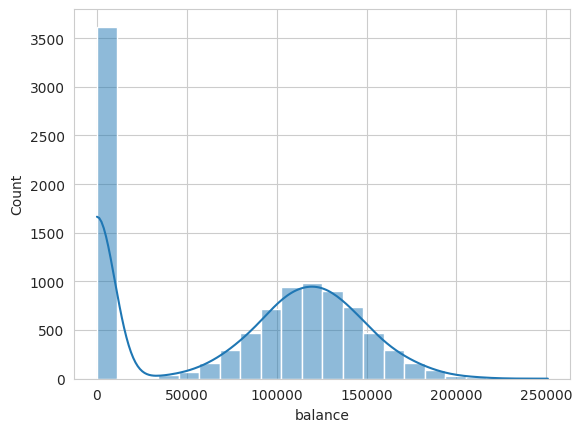

In [9]:
sns.histplot(data=data, x="balance", kde=True)

In [10]:
#sns.histplot(data=data, x="estimated_salary", kde=True)

In [11]:
#sns.histplot(data=data, x="age", kde=True)

In [12]:
#sns.histplot(data=data, x="tenure", kde=True)

In [13]:
#sns.histplot(data=data, x="products_number", kde=True)

In [14]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [15]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
c_one_hot = pd.get_dummies(data['country'])
c_one_hot.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [18]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
data2.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [19]:
data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0)

In [20]:
data2.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain,zero_balance
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,0


In [21]:
data2 = data2.drop('balance',axis = 1)

In [22]:
data2.head()

,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain,zero_balance
0,619,42,2,1,1,1,101348.88,1,1,0,1,0,0,1
1,608,41,1,1,0,1,112542.58,0,1,0,0,0,1,0
2,502,42,8,3,1,0,113931.57,1,1,0,1,0,0,0
3,699,39,1,2,0,0,93826.63,0,1,0,1,0,0,1
4,850,43,2,1,1,1,79084.10,0,1,0,0,0,1,0


In [23]:
data2.dtypes

credit_score          int64
age                   int64
tenure                int64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
zero_balance          int64
dtype: object

In [26]:
corr_matrix = data2.corr()
print(corr_matrix)

                  credit_score       age    tenure  products_number  \
credit_score          1.000000 -0.003965  0.000842         0.012238   
age                  -0.003965  1.000000 -0.009997        -0.030680   
tenure                0.000842 -0.009997  1.000000         0.013444   
products_number       0.012238 -0.030680  0.013444         1.000000   
credit_card          -0.005458 -0.011721  0.022583         0.003183   
active_member         0.025651  0.085472 -0.028362         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784         0.014204   
churn                -0.027094  0.285323 -0.014001        -0.047820   
Female                0.002857  0.027544 -0.014733         0.021859   
Male                 -0.002857 -0.027544  0.014733        -0.021859   
France               -0.008928 -0.039208 -0.002848         0.001230   
Germany               0.005538  0.046897 -0.000567        -0.010419   
Spain                 0.004780 -0.001685  0.003868         0.009039   
zero_b

TypeError: title() missing 1 required positional argument: 'label'

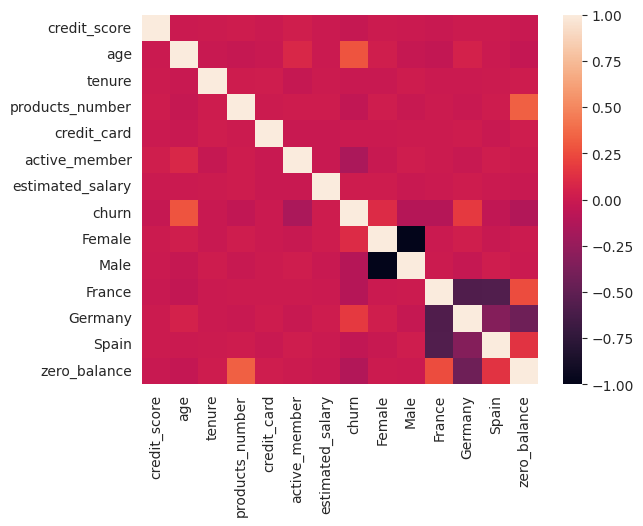

In [36]:
sns.heatmap(corr_matrix)
plt.title(main="Correlation Matrix for Variables")
plt.show()